In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats


I start each toss with 1£ and I bet a fraction *f*. At each toss I can either get head and win, or tail and loose. In case of winning my wealth is going to be: $y = 1 + 2\times f \times 1£ = (1+2f)$. In cae of loosing my wealth is going to be $y = 1 - f\times 1 = 1 (1-f) $. Therefore, at each win I multiply my wealth by $1+2f$, while at each loss I multiply my wealth by $1-f$. The final amount I obtain is $y = (1+2f)^w \times (1-f)^{(1000-w)} £$, where $w$ is the number of wins I obtain out of 1000 tosses. In order to find the optimal $f$ which lets us become billionaris with the least number of tosses we want to minimise the following function with respect to $f$: $(1+2f)^w \times (1-f)^{(1000-w)} \geq 10^9$. I first computer the minimun number of wins to get to $10^9$ and compute the fraction of my initial wealth to bet. Once I have found the result I can look up the value f which correspond to the minimun number of throws.
I initialise the $f$, setting it from 0 to 1 with increasing step of 0.0001.

In [142]:
f = np.arange(0,1,0.0001)

In [143]:
w = [ 1000 for i in range(len(f))]

In [144]:
for i in range(len(f)):
    flag = 0
    for j in range(1,1000):
        if flag == 0:
            if ((1+2*f[i])**j)*((1-f[i])**(1000-j)) >= 10**9:
                w[i] = j
                flag = 1

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


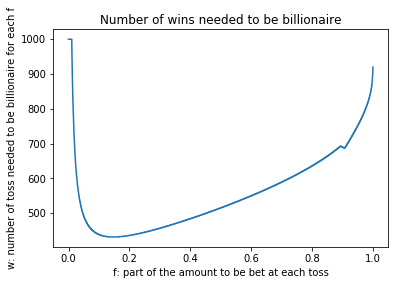

In [145]:
# Now we can plot this number of wins needed for each f
plt.plot(f,w)
plt.title ('Number of wins needed to be billionaire');
plt.xlabel('f: part of the amount to be bet at each toss');
plt.ylabel('w: number of toss needed to be billionaire for each f');

The minimum number of wins is given by $min(w)$

In [147]:
min(w)

432

The minimum number of tosses to become a billionaire is 432. We can now find the initial fraction of our wealth needed to invest to achieve the 1B target.

In [148]:
index = w.index(min(w))
f[index]

0.1296

In order to calculate the probability of becoming billionaire I need to compute the chance of obtaining at least 432 heads on 1000 tosses. As we have equal chance to obtain heads or tails at each toss, the probability of obtaining x heads over 1000 will follow a binomial distribution with $n=1000$, $p=0.5$

In [149]:
n = 1000
p = 0.5
k = np.arange(1000)
binomial = scipy.stats.binom.pmf(k,n,p)


Ultimately the probability of becoming a billionaire is the cumulative probaility of obtaining $432$ ore more heads.

In [151]:
p = (sum(binomial[432:1000]))


In [152]:
p.round(12)

0.999992836187